In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.io
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [3]:
# Load the .mat file
mat_data = scipy.io.loadmat('Gaze360/metadata.mat')

# Access data
print(mat_data)  # This will print all the contents of the .mat file




{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jun 28 13:47:39 2019', '__version__': '1.0', '__globals__': [], 'recordings': array([[array(['rec_000'], dtype='<U7'), array(['rec_001'], dtype='<U7'),
        array(['rec_002'], dtype='<U7'), array(['rec_003'], dtype='<U7'),
        array(['rec_004'], dtype='<U7'), array(['rec_005'], dtype='<U7'),
        array(['rec_006'], dtype='<U7'), array(['rec_007'], dtype='<U7'),
        array(['rec_008'], dtype='<U7'), array(['rec_009'], dtype='<U7'),
        array(['rec_010'], dtype='<U7'), array(['rec_011'], dtype='<U7'),
        array(['rec_012'], dtype='<U7'), array(['rec_013'], dtype='<U7'),
        array(['rec_014'], dtype='<U7'), array(['rec_015'], dtype='<U7'),
        array(['rec_016'], dtype='<U7'), array(['rec_017'], dtype='<U7'),
        array(['rec_018'], dtype='<U7'), array(['rec_019'], dtype='<U7'),
        array(['rec_020'], dtype='<U7'), array(['rec_021'], dtype='<U7'),
        array(['rec_022'], dtype='<U7'

In [4]:
your_variable = mat_data['recordings']
print(your_variable)


[[array(['rec_000'], dtype='<U7') array(['rec_001'], dtype='<U7')
  array(['rec_002'], dtype='<U7') array(['rec_003'], dtype='<U7')
  array(['rec_004'], dtype='<U7') array(['rec_005'], dtype='<U7')
  array(['rec_006'], dtype='<U7') array(['rec_007'], dtype='<U7')
  array(['rec_008'], dtype='<U7') array(['rec_009'], dtype='<U7')
  array(['rec_010'], dtype='<U7') array(['rec_011'], dtype='<U7')
  array(['rec_012'], dtype='<U7') array(['rec_013'], dtype='<U7')
  array(['rec_014'], dtype='<U7') array(['rec_015'], dtype='<U7')
  array(['rec_016'], dtype='<U7') array(['rec_017'], dtype='<U7')
  array(['rec_018'], dtype='<U7') array(['rec_019'], dtype='<U7')
  array(['rec_020'], dtype='<U7') array(['rec_021'], dtype='<U7')
  array(['rec_022'], dtype='<U7') array(['rec_023'], dtype='<U7')
  array(['rec_024'], dtype='<U7') array(['rec_025'], dtype='<U7')
  array(['rec_026'], dtype='<U7') array(['rec_027'], dtype='<U7')
  array(['rec_028'], dtype='<U7') array(['rec_029'], dtype='<U7')
  array(['

In [5]:
len(mat_data['person_eyes2d'])

197588

In [24]:
import torch
import math

In [25]:
def compute_spherical_vector(normalized_gaze):
    spherical_vector = torch.FloatTensor(2)
    # theta: horizontal angle (yaw)
    spherical_vector[0] = math.atan2(normalized_gaze[0], -normalized_gaze[2])
    # phi: vertical angle (pitch)
    spherical_vector[1] = math.asin(normalized_gaze[1])
    return spherical_vector

In [41]:
def spherical2cartesial(x):
    
    output = torch.zeros(3)
    output[2] = -torch.cos(x[1])*torch.cos(x[0])
    output[0] = torch.cos(x[1])*torch.sin(x[0])
    output[1] = torch.sin(x[1])

    return output

In [81]:
def draw_gaze_arrow(im_rgb, eye_gaze_2d, eye_position, scale=50):
    """
    Draw an arrow on the image pointing in the direction of eye gaze.

    Parameters:
    - im_rgb: The image (RGB format) on which to draw.
    - eye_gaze_2d: A 2D tensor containing pitch (vertical angle) and yaw (horizontal angle).
    - eye_position: A tuple (x, y) representing the position of the eye in the image (where the arrow starts).
    - scale: A scaling factor to control the length of the arrow.
    """
    # Extract yaw and pitch from the 2D tensor
    yaw = eye_gaze_2d[0].item()  # Horizontal angle (theta)
    pitch = eye_gaze_2d[1].item()  # Vertical angle (phi)

    # Project the 2D gaze direction to x and y components on the image
    x_2d = math.cos(pitch) * math.sin(yaw)  # Horizontal direction
    y_2d = math.sin(pitch)  # Vertical direction

    # pitch = pitch*2*math.pi
    # yaw = yaw*2*math.pi
    dx = math.cos(pitch)*math.sin(yaw)
    dy = math.sin(pitch)

    # Compute the end point of the arrow, scaled by the 'scale' factor
    end_point = (
        int(eye_position[0] - x_2d * scale),
        int(eye_position[1] - y_2d * scale)  # Negative because the y-axis is inverted in image coordinates
    )
    
    # Draw the arrow on the image
    cv2.arrowedLine(im_rgb, eye_position, end_point, (0, 255, 0), 2, tipLength=0.3)

    return im_rgb

Image path: ./Gaze360/imgs/rec_009/head/000079/000711.jpg
Index: 27469
	gaze_3d =[-0.85988642  0.22511337  0.45816952]
	eyes2d =[0.5314353 0.5068664]
	eye_gaze_2d =tensor([-2.0604,  0.2271])
	eye_gaze_2d_cartesial =tensor([-0.8599,  0.2251,  0.4582])


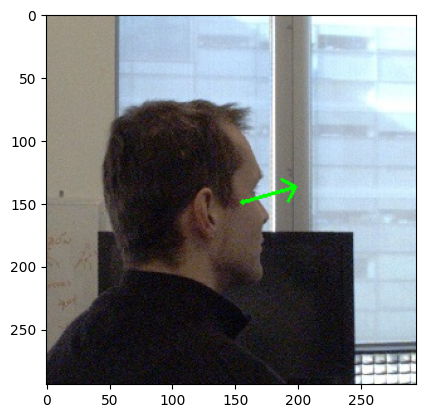

In [215]:
recordings = mat_data['recordings'][0]
recording = mat_data['recording'][0]
cropType = "head"
frame = mat_data['frame'][0]
person_identity = mat_data['person_identity'][0]
person_eyes2d = mat_data['person_eyes2d']
gaze_dir = mat_data['gaze_dir']
person_head_bbox = mat_data['person_head_bbox']
person_eye_left_bbox = mat_data['person_eye_left_bbox']

i = randint(0,len(recording)-1)

path = "./Gaze360/imgs/"
path +=    str(recordings[recording[i]][0])
path +=     "/"
path +=     cropType
path +=     "/"
path +=     '%06d' % person_identity[i]
path +=     "/"
path +=     '%06d.jpg' % frame[i]

print(f"Image path: {path}")

im = cv2.imread(path)

gaze_3d = gaze_dir[i]
print(f"Index: {i}")
print(f"\tgaze_3d ={gaze_3d}")
print(f"\teyes2d ={person_eyes2d[i]}")

# 2D transformations:
eye_gaze_2d = compute_spherical_vector(gaze_3d)
teye_gaze_2d_cartesial = spherical2cartesial(eye_gaze_2d)
print(f"\teye_gaze_2d ={eye_gaze_2d}")
print(f"\teye_gaze_2d_cartesial ={teye_gaze_2d_cartesial}")

im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
height,width,_ = im_rgb.shape
dot_pos = (int(person_eyes2d[i][0]*width),int(person_eyes2d[i][1]*height))
im_rgb = cv2.circle(im_rgb, dot_pos, radius=2, color=(0, 255, 0), thickness=-1)  # Green color, filled circle
im_rgb = draw_gaze_arrow(im_rgb,eye_gaze_2d,dot_pos)


plt.imshow(im_rgb)

In [7]:
headBBInFull = person_head_bbox[i,:]
eyeBBInFull = person_eye_left_bbox[i,:]
eyeBBInCrop = [
    (eyeBBInFull[0] - headBBInFull[0]) / headBBInFull[2], # subtract offset of the crop
    (eyeBBInFull[1] - headBBInFull[1]) / headBBInFull[3], 
    eyeBBInFull[2] / headBBInFull[2], # scale to smaller space of the crop
    eyeBBInFull[3] / headBBInFull[3], 
    ]
imHead = im_rgb
cropSizePx = np.array([imHead.shape[1], imHead.shape[0]]) # should be equal to -> (headBBInFull[2:] * [3382, 4096]).astype(int)
eyeBBInCropPx = np.concatenate([eyeBBInCrop[:2] * cropSizePx, eyeBBInCrop[2:] * cropSizePx]).astype(int)

imEye = imHead[
    eyeBBInCropPx[1]:(eyeBBInCropPx[1]+eyeBBInCropPx[3]), 
    eyeBBInCropPx[0]:(eyeBBInCropPx[0]+eyeBBInCropPx[2]),
    :]

imEye

array([], shape=(0, 0, 3), dtype=uint8)

In [8]:
eyeBBInFull

array([-1., -1., -1., -1.], dtype=float32)